In [9]:
import os
import pandas as pd
import skimage as sk
from skimage import io as skio, transform
import numpy as np
import matplotlib.pyplot as plt
from cpselect.cpselect import cpselect
import json

In [2]:
shelf1 = skio.imread('shelf1.jpg', as_gray=True)
shelf2 = skio.imread('shelf2.jpg', as_gray=True)

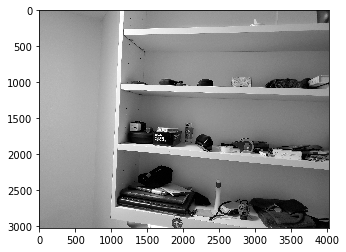

In [4]:
plt.figure()
plt.imshow(shelf2, cmap='gray')
plt.show()

In [6]:
controlpointlist = cpselect("shelf1.jpg", "shelf2.jpg")


In [11]:
with open('pts.json') as jsonfile:
    controlpointlist = json.load(jsonfile)

In [22]:
shelf1_pts = []
shelf2_pts = []
for i in controlpointlist:
    shelf1_pts.append([i['img1_x'], i['img1_y'], 1])
    shelf2_pts.append([i['img2_x'], i['img2_y'], 1])
shelf1_pts = np.array(shelf1_pts)
shelf2_pts = np.array(shelf2_pts)

In [29]:
def compute_H(pts_1, pts_2):
    H_lst = np.linalg.lstsq(pts_1.T, pts_2.T, rcond=None)[0].T
    return H_lst

In [30]:
H = compute_H(shelf1_pts, shelf2_pts)
print(H)

[[ 0.07915708  0.08591562  0.02539595  0.04362651  0.0530696   0.2015149
   0.16928627  0.15237419  0.02576222  0.08185905 -0.01437815 -0.03167859
   0.02435748  0.01288037  0.03796762  0.05288986]
 [ 0.06064933  0.07207894  0.01062117  0.04111218  0.04579903  0.21353478
   0.16751503  0.16699393  0.00742312  0.09575838 -0.02847788 -0.0350002
   0.02803709  0.02415206  0.0550408   0.07476223]
 [ 0.02206268  0.03307098  0.02652898  0.05545912  0.0454452   0.09973111
   0.06633101  0.10198527  0.01853332  0.09520149  0.02513655  0.04812913
   0.06798961  0.08423744  0.09913188  0.11102621]
 [-0.04845804 -0.01989731 -0.02863729  0.04635283  0.01810022  0.14216986
   0.05722235  0.15538016 -0.05015044  0.14744771 -0.02657899  0.03765233
   0.08279147  0.12807184  0.16439203  0.19414126]
 [-0.00558335  0.01505563 -0.0077395   0.04658773  0.03071861  0.15394967
   0.0891447   0.14876025 -0.02174712  0.12367676 -0.01760299  0.01965002
   0.06505598  0.09152049  0.12241649  0.14613663]
 [-0.05